<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r11-kk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-normal-n-0-3-r11.csv?token=AKVFSODZWH5Y27EIWDV36PC6ZQD4O')
print(df.shape)
df

(49198, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,146,3,4,4,1,1,5,17,24,8,3,3,3,5,3,0.6,16,5,1,5,5,25,12,4,4,12,20,85,100,1
1,147,3,4,4,2,2,5,17,24,8,3,3,3,5,3,0.6,17,4,2,5,8,40,12,8,16,48,20,85,100,1
2,148,3,4,4,3,2,5,17,24,8,3,3,3,5,3,0.6,18,3,3,5,9,45,12,12,24,72,20,85,100,1
3,149,3,4,4,4,2,5,17,24,8,3,3,3,5,3,0.6,19,2,4,5,8,40,12,16,32,96,20,85,100,1
4,153,3,4,4,5,3,5,17,24,8,3,3,3,5,3,0.6,23,1,5,5,5,25,12,20,60,180,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49193,3269159,0,3,5,2,2,3,9,3,3,27,11,20046,2,2,1.0,19,1,1,1,1,1,0,10,20,400920,15,27,45,1
49194,3269166,0,3,5,3,2,3,9,3,3,27,11,20046,2,2,1.0,26,1,1,1,1,1,0,15,30,601380,15,27,45,1
49195,3269173,0,3,5,4,2,3,9,3,3,27,11,20046,2,2,1.0,33,1,1,1,1,1,0,20,40,801840,15,27,45,1
49196,3269180,0,3,5,5,3,3,9,3,3,27,11,20046,2,2,1.0,40,1,1,1,1,1,0,25,75,1503450,15,27,45,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-1-r11.csv?token=AKVFSOFJIUEYJ64IEFLW3KK6ZQD4S')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-6-r11.csv?token=AKVFSOHMQBTANKYQPYDDYL26ZQD4W')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-9-r11.csv?token=AKVFSOB3WXDJK5BS5YUTY2S6ZQD4Y')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-14-r11.csv?token=AKVFSOG6AI6DIL3WNUUKNUK6ZQD5I')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-normal-n-0-5-r11.csv?token=AKVFSOD77C4ONIEDBPO47U26ZQEEI')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-normal-n-0-12-r11.csv?token=AKVFSODNDAJLWFRNXGFSNPC6ZQEEM')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-normal-n-0-15-r11.csv?token=AKVFSODS3ZO4VI6PAGQNB626ZQEEQ')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(69998, 30)
(69998, 30)
(74798, 30)
(72887, 30)
(40971, 30)
(43866, 30)
(67771, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,3,1,1,1,4,3,9,15,15,23,7,2,2,1,0.500000,8,6,1,6,6,36,3,1,4,8,3,27,9,1
1,15,3,4,1,1,4,3,9,9,9,23,7,3,3,2,0.666667,12,1,1,1,1,1,12,1,4,12,3,27,9,0
2,15,3,1,1,1,4,3,9,14,14,23,7,3,3,2,0.666667,12,1,1,1,1,1,3,1,4,12,3,27,9,0
3,23,3,1,1,1,4,3,9,12,12,23,7,2,5,4,0.800000,20,1,1,1,1,1,3,1,4,8,3,27,9,1
4,58,1,3,4,1,1,5,17,23,7,15,15,2,2,1,0.500000,8,5,2,6,10,60,3,4,4,8,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489482,3275770,0,4,3,1,4,3,9,24,8,27,11,20062,3,3,1.000000,16,5,5,9,25,225,0,3,12,240744,9,27,27,1
489483,3275771,1,4,4,1,1,5,17,24,8,15,15,20062,4,3,0.750000,17,4,6,9,24,216,4,4,4,80248,20,85,100,1
489484,3275772,1,4,4,2,2,5,17,24,8,15,15,20062,4,3,0.750000,18,3,7,9,21,189,4,8,16,320992,20,85,100,1
489485,3275773,1,4,4,3,2,5,17,24,8,15,15,20062,4,3,0.750000,19,2,8,9,16,144,4,12,24,481488,20,85,100,1


In [0]:
df.shape

(489487, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-2-r11.csv?token=AKVFSOEK7WLJAX3UK6H4HKS6ZQEJ2')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-5-r11.csv?token=AKVFSOHSLKONNNAZXFF7ZAS6ZQEKA')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-10-r11.csv?token=AKVFSOB7HBQQAG3SUEKUSXK6ZQEKE')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-12-r11.csv?token=AKVFSOF6BUT5Z6ZPSHEIIN26ZQEKI')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-13-r11.csv?token=AKVFSOCXSFAOZK7SMEJCB3C6ZQEKO')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-malicious-n-0-3-m-15-r11.csv?token=AKVFSOGKZ7P4TBIHQD7JEKS6ZQEKU')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r11/2-fft-normal-n-0-10-r11.csv?token=AKVFSOFFLOM6D7MBDWXWPKK6ZQET6')
df5.shape

(70001, 30)

In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,146,3,4,4,1,1,5,17,24,8,3,3,4,5,3,0.6,16,5,1,5,5,25,12,4,4,16,20,85,100,0
1,147,3,4,4,2,2,5,17,24,8,3,3,4,5,3,0.6,17,4,2,5,8,40,12,8,16,64,20,85,100,0
2,148,3,4,4,3,2,5,17,24,8,3,3,4,5,3,0.6,18,3,3,5,9,45,12,12,24,96,20,85,100,0
3,149,3,4,4,4,2,5,17,24,8,3,3,4,5,3,0.6,19,2,4,5,8,40,12,16,32,128,20,85,100,0
4,153,3,4,4,5,3,5,17,24,8,3,3,4,5,3,0.6,23,1,5,5,5,25,12,20,60,240,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,3269842,4,0,3,1,4,3,10,27,11,30,14,30060,2,0,0.0,8,2,8,9,16,144,0,3,12,360720,9,30,27,0
69997,3269845,3,0,4,5,3,5,17,27,11,3,3,30060,2,0,0.0,11,1,9,9,9,81,0,20,60,1803600,20,85,100,0
69998,3270669,0,3,5,1,1,3,9,3,3,27,11,30069,2,2,1.0,12,1,1,1,1,1,0,5,5,150345,15,27,45,0
69999,3270676,0,3,5,2,2,3,9,3,3,27,11,30069,2,2,1.0,19,1,1,1,1,1,0,10,20,601380,15,27,45,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.389923,-0.183765,0.012661,-0.019363,0.548652,0.622718,-0.002240,0.282328,-0.644909,-0.911164,-0.603301,-0.102498,0.138228,0.022892,0.022270,0.010837,0.157694,-0.125139,-0.089675,-0.066931,0.278983,0.587323,0.493633,-0.056779
inport,-0.389923,1.000000,-0.041228,-0.003404,0.005195,-0.087909,-0.202222,0.003245,0.328626,0.685114,0.554992,0.371176,0.027101,-0.126839,-0.063902,-0.064027,-0.053636,0.703664,-0.025712,-0.018965,-0.013971,-0.107536,-0.156034,-0.109614,-0.010682
cache_coherence_type,-0.183765,-0.041228,1.000000,0.265123,-0.405552,-0.307313,-0.339683,0.042504,-0.091951,0.100864,0.215612,-0.013351,0.044412,-0.069223,-0.015896,-0.013561,-0.003925,-0.052293,0.517491,0.407898,0.316426,0.641327,-0.321769,0.110920,-0.009418
flit_id,0.012661,-0.003404,0.265123,1.000000,0.003240,0.195137,0.153715,0.001734,0.042116,0.005796,0.002302,0.297802,-0.040815,0.072383,0.020225,0.005421,0.004135,0.023052,0.937499,0.902638,0.652666,0.393059,0.178101,0.318293,0.005824
flit_type,-0.019363,0.005195,-0.405552,0.003240,1.000000,-0.298506,-0.235142,-0.002657,-0.064428,-0.008870,-0.003525,0.318489,-0.043820,0.089608,0.029336,0.017328,0.014422,-0.035267,-0.065916,0.192368,0.139249,-0.601261,-0.272445,-0.486895,-0.008916
vnet,0.548652,-0.087909,-0.307313,0.195137,-0.298506,1.000000,0.972382,-0.049828,0.235806,-0.360143,-0.554970,-0.543454,-0.107979,0.087154,-0.013342,-0.021231,-0.029424,0.240524,-0.044028,-0.069012,-0.079186,0.533051,0.990804,0.911649,0.031522
vc,0.622718,-0.202222,-0.339683,0.153715,-0.235142,0.972382,1.000000,-0.042272,0.205108,-0.453676,-0.649610,-0.578591,-0.103364,0.114279,0.006993,0.000303,-0.010160,0.155978,-0.084598,-0.093885,-0.093005,0.482002,0.994071,0.868826,0.020552
traversal_id,-0.002240,0.003245,0.042504,0.001734,-0.002657,-0.049828,-0.042272,1.000000,-0.017564,0.006320,0.011940,0.034710,0.166049,0.166099,0.212806,0.164858,0.134696,0.003683,0.019406,0.016067,0.539419,-0.002385,-0.046109,-0.033682,-0.325837
hop_count,0.282328,0.328626,-0.091951,0.042116,-0.064428,0.235806,0.205108,-0.017564,1.000000,0.448939,-0.061081,0.122837,-0.068959,-0.073329,-0.091163,-0.077263,-0.066206,0.395958,-0.041440,-0.034497,-0.034303,0.108372,0.217252,0.206557,0.075304
current_hop,-0.644909,0.685114,0.100864,0.005796,-0.008870,-0.360143,-0.453676,0.006320,0.448939,1.000000,0.788121,0.684662,0.039149,-0.185446,-0.093733,-0.080668,-0.061558,0.306577,0.072664,0.051168,0.041336,-0.200699,-0.413810,-0.332562,0.049761


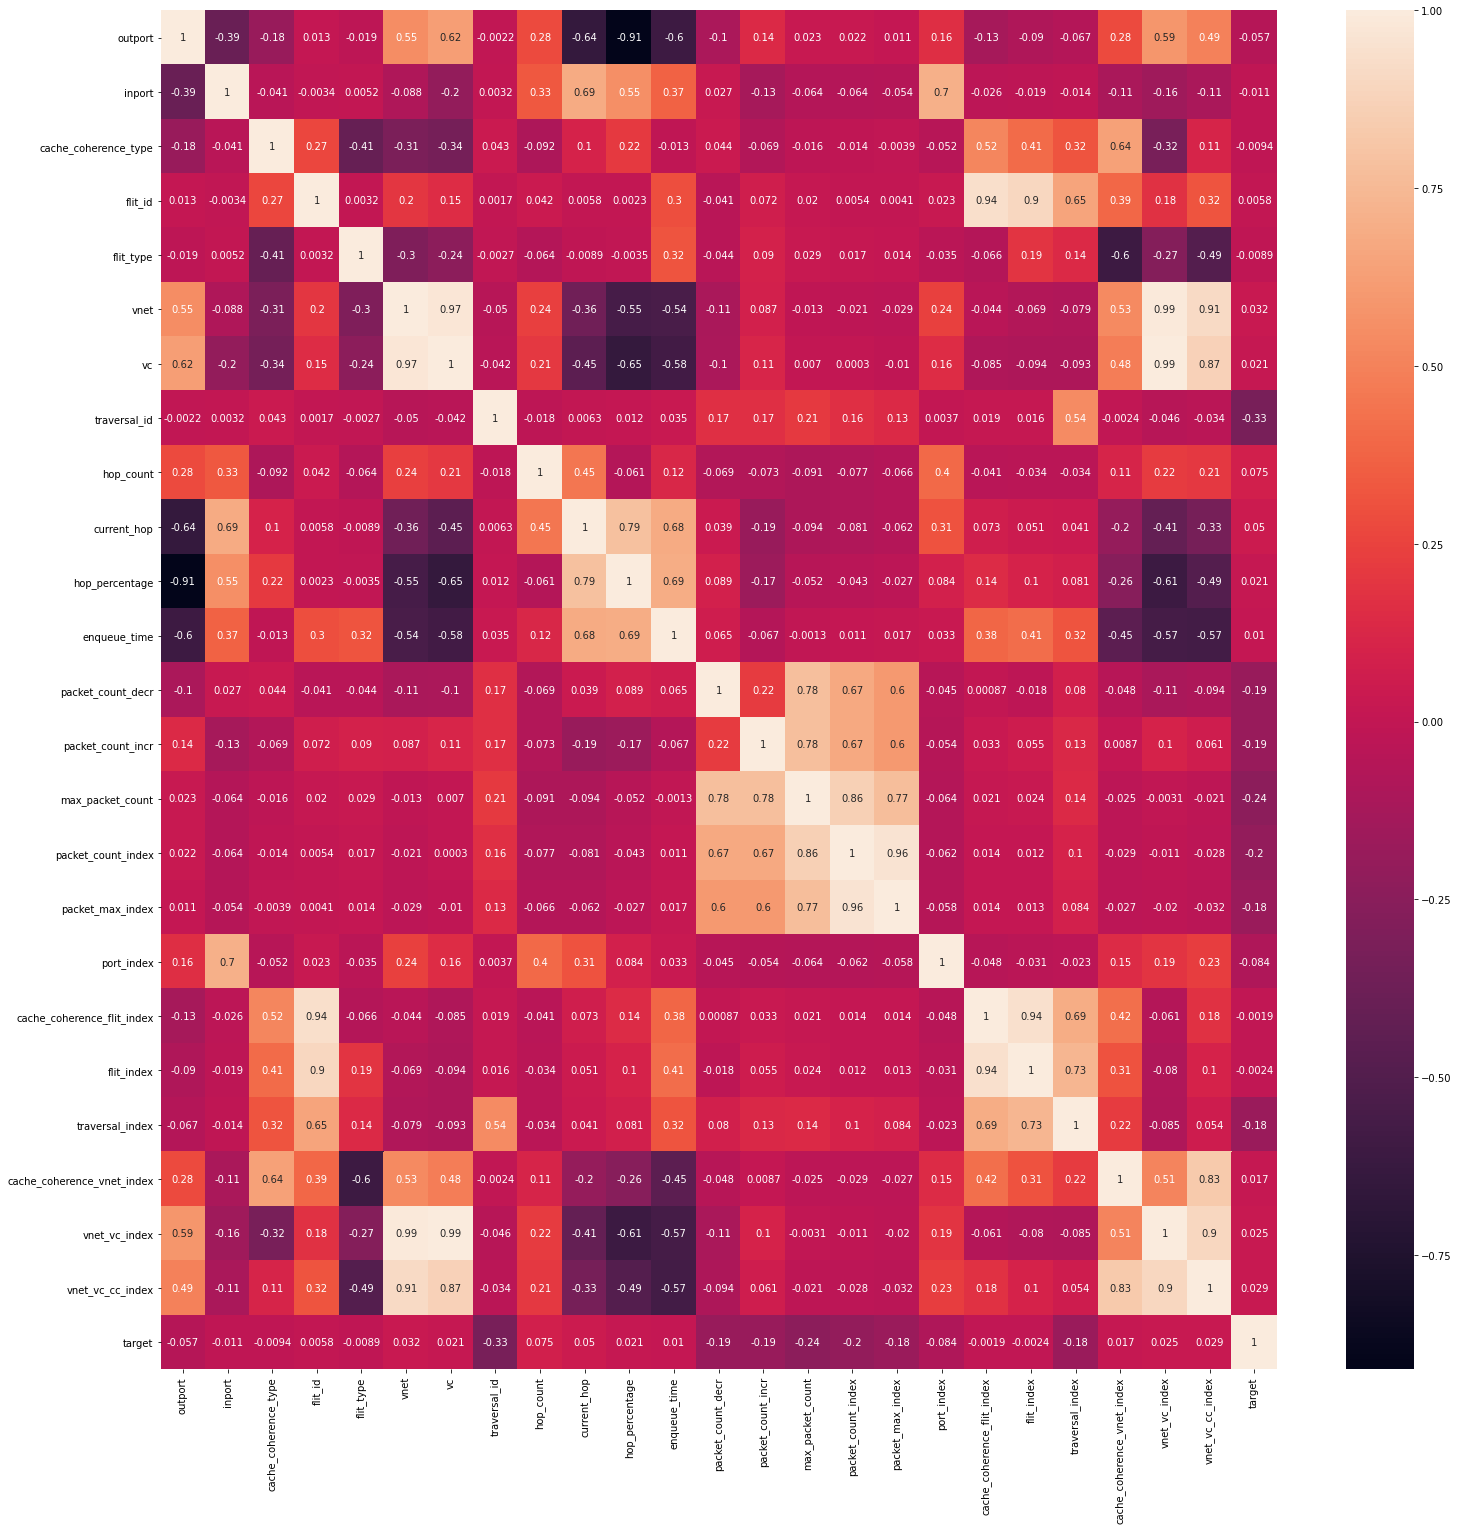

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,3,1,1,1,4,3,9,2,2,1,0.500000,8,6,1,6,6,36,3,1,4,8,3,27,9
1,3,4,1,1,4,3,9,3,3,2,0.666667,12,1,1,1,1,1,12,1,4,12,3,27,9
2,3,1,1,1,4,3,9,3,3,2,0.666667,12,1,1,1,1,1,3,1,4,12,3,27,9
3,3,1,1,1,4,3,9,2,5,4,0.800000,20,1,1,1,1,1,3,1,4,8,3,27,9
4,1,3,4,1,1,5,17,2,2,1,0.500000,8,5,2,6,10,60,3,4,4,8,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489482,0,4,3,1,4,3,9,20062,3,3,1.000000,16,5,5,9,25,225,0,3,12,240744,9,27,27
489483,1,4,4,1,1,5,17,20062,4,3,0.750000,17,4,6,9,24,216,4,4,4,80248,20,85,100
489484,1,4,4,2,2,5,17,20062,4,3,0.750000,18,3,7,9,21,189,4,8,16,320992,20,85,100
489485,1,4,4,3,2,5,17,20062,4,3,0.750000,19,2,8,9,16,144,4,12,24,481488,20,85,100


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.2,0.500000,0.048780,0.138889,0.000000,0.138889,0.013889,0.002621,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.4,0.4,0.666667,0.097561,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.75,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.4,0.4,0.666667,0.097561,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.75,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.8,0.8,0.800000,0.195122,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.25,0.75,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.2,0.2,0.500000,0.048780,0.111111,0.027778,0.138889,0.025000,0.004417,0.250000,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489482,0.00,1.00,0.333333,0.00,1.000000,0.0,0.000000,0.666645,0.4,0.6,1.000000,0.146341,0.111111,0.111111,0.222222,0.066667,0.016771,0.000000,0.068966,0.093023,0.088889,0.333333,0.000000,0.197802
489483,0.25,1.00,0.500000,0.00,0.000000,1.0,0.727273,0.666645,0.6,0.6,0.750000,0.158537,0.083333,0.138889,0.222222,0.063889,0.016098,0.333333,0.103448,0.000000,0.029628,0.944444,0.794521,1.000000
489484,0.25,1.00,0.500000,0.25,0.333333,1.0,0.727273,0.666645,0.6,0.6,0.750000,0.170732,0.055556,0.166667,0.222222,0.055556,0.014076,0.333333,0.241379,0.139535,0.118520,0.944444,0.794521,1.000000
489485,0.25,1.00,0.500000,0.50,0.333333,1.0,0.727273,0.666645,0.6,0.6,0.750000,0.182927,0.027778,0.194444,0.222222,0.041667,0.010707,0.333333,0.379310,0.232558,0.177781,0.944444,0.794521,1.000000


In [0]:
train_X[train_X.duplicated()].shape

(9779, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.00,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.8,0.6,0.6,0.173913,0.105263,0.000000,0.105263,0.010025,0.001539,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.000000
1,0.75,1.00,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.8,0.6,0.6,0.188406,0.078947,0.026316,0.105263,0.017544,0.002500,1.0,0.241379,0.139535,0.000018,0.944444,0.794521,1.000000
2,0.75,1.00,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.8,0.6,0.6,0.202899,0.052632,0.052632,0.105263,0.020050,0.002821,1.0,0.379310,0.232558,0.000030,0.944444,0.794521,1.000000
3,0.75,1.00,0.500000,0.75,0.333333,1.0,0.727273,0.000000,0.8,0.6,0.6,0.217391,0.026316,0.078947,0.105263,0.017544,0.002500,1.0,0.517241,0.325581,0.000041,0.944444,0.794521,1.000000
4,0.75,1.00,0.500000,1.00,0.666667,1.0,0.727273,0.000000,0.8,0.6,0.6,0.275362,0.000000,0.105263,0.105263,0.010025,0.001539,1.0,0.655172,0.651163,0.000083,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,1.00,0.00,0.333333,0.00,1.000000,0.0,0.090909,0.999701,0.2,0.0,0.0,0.057971,0.026316,0.184211,0.210526,0.037594,0.009167,0.0,0.068966,0.093023,0.133333,0.333333,0.041096,0.197802
69997,0.75,0.00,0.500000,1.00,0.666667,1.0,0.727273,0.999701,0.2,0.0,0.0,0.101449,0.000000,0.210526,0.210526,0.020050,0.005129,0.0,0.655172,0.651163,0.666687,0.944444,0.794521,1.000000
69998,0.00,0.75,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.2,0.4,1.0,0.115942,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.137931,0.011628,0.055568,0.666667,0.000000,0.395604
69999,0.00,0.75,0.666667,0.25,0.333333,0.0,0.000000,1.000000,0.2,0.4,1.0,0.217391,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.310345,0.186047,0.222292,0.666667,0.000000,0.395604


In [0]:
test_X[test_X.duplicated()].shape

(12, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(23, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.5,0.00,0.000000,1.0,0.727273,0.0,0.8,0.6,0.6,0.166667,0.111111,0.000000,0.111111,0.011111,0.001797,1.0,0.103448,0.000000,0.000000,0.944444,0.794521,1.0
1,0.75,1.0,0.5,0.25,0.333333,1.0,0.727273,0.0,0.8,0.6,0.6,0.180556,0.083333,0.027778,0.111111,0.019444,0.002920,1.0,0.241379,0.139535,0.000018,0.944444,0.794521,1.0
2,0.75,1.0,0.5,0.50,0.333333,1.0,0.727273,0.0,0.8,0.6,0.6,0.194444,0.055556,0.055556,0.111111,0.022222,0.003294,1.0,0.379310,0.232558,0.000030,0.944444,0.794521,1.0
3,0.75,1.0,0.5,0.75,0.333333,1.0,0.727273,0.0,0.8,0.6,0.6,0.208333,0.027778,0.083333,0.111111,0.019444,0.002920,1.0,0.517241,0.325581,0.000041,0.944444,0.794521,1.0
4,0.75,1.0,0.5,1.00,0.666667,1.0,0.727273,0.0,0.8,0.6,0.6,0.263889,0.000000,0.111111,0.111111,0.011111,0.001797,1.0,0.655172,0.651163,0.000083,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69949,0.75,0.0,0.5,0.00,0.000000,1.0,0.727273,1.0,0.2,0.0,0.0,0.013889,0.111111,0.027778,0.138889,0.025000,0.004417,0.0,0.103448,0.000000,0.044440,0.944444,0.794521,1.0
69950,0.75,0.0,0.5,0.25,0.333333,1.0,0.727273,1.0,0.2,0.0,0.0,0.027778,0.083333,0.055556,0.138889,0.030556,0.005316,0.0,0.241379,0.139535,0.177779,0.944444,0.794521,1.0
69951,0.75,0.0,0.5,0.50,0.333333,1.0,0.727273,1.0,0.2,0.0,0.0,0.041667,0.055556,0.083333,0.138889,0.030556,0.005316,0.0,0.379310,0.232558,0.266671,0.944444,0.794521,1.0
69952,0.75,0.0,0.5,0.75,0.333333,1.0,0.727273,1.0,0.2,0.0,0.0,0.055556,0.027778,0.111111,0.138889,0.025000,0.004417,0.0,0.517241,0.325581,0.355564,0.944444,0.794521,1.0


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(42, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.2,0.5,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,1.0,0.500000,0.00,0.000000,1.0,0.727273,0.000033,0.8,0.6,0.6,0.166667,0.111111,0.000000,0.111111,0.011111,0.001797,1.0,0.103448,0.000000,0.000001,0.944444,0.794521,1.000000
2,0.75,1.0,0.500000,0.25,0.333333,1.0,0.727273,0.000033,0.8,0.6,0.6,0.180556,0.083333,0.027778,0.111111,0.019444,0.002920,1.0,0.241379,0.139535,0.000019,0.944444,0.794521,1.000000
3,0.75,1.0,0.500000,0.50,0.333333,1.0,0.727273,0.000033,0.8,0.6,0.6,0.194444,0.055556,0.055556,0.111111,0.022222,0.003294,1.0,0.379310,0.232558,0.000031,0.944444,0.794521,1.000000
4,0.75,1.0,0.500000,0.75,0.333333,1.0,0.727273,0.000033,0.8,0.6,0.6,0.208333,0.027778,0.083333,0.111111,0.019444,0.002920,1.0,0.517241,0.325581,0.000043,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74806,1.00,0.0,0.833333,0.50,0.333333,0.0,0.181818,0.999967,0.4,0.0,0.0,0.194444,0.111111,0.000000,0.111111,0.011111,0.001797,0.0,0.586207,0.372093,0.399997,0.833333,0.082192,0.494505
74807,1.00,0.0,0.833333,0.75,0.333333,0.0,0.181818,0.999967,0.4,0.0,0.0,0.291667,0.083333,0.027778,0.111111,0.019444,0.002920,0.0,0.793103,0.511628,0.533331,0.833333,0.082192,0.494505
74808,1.00,0.0,0.833333,1.00,0.666667,0.0,0.181818,0.999967,0.4,0.0,0.0,0.388889,0.055556,0.055556,0.111111,0.022222,0.003294,0.0,1.000000,1.000000,1.000000,0.833333,0.082192,0.494505
74809,1.00,0.0,0.166667,0.00,1.000000,0.0,0.272727,1.000000,0.4,0.0,0.0,0.388889,0.027778,0.083333,0.111111,0.019444,0.002920,0.0,0.034483,0.046512,0.088888,0.166667,0.123288,0.098901


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(26, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.8,0.8,0.8,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,1.00,0.500000,0.00,0.000000,1.0,0.727273,0.000033,0.8,0.6,0.6,0.166667,0.114286,0.000000,0.114286,0.011730,0.001949,1.00,0.103448,0.000000,0.000001,0.944444,0.794521,1.000000
2,0.75,1.00,0.500000,0.25,0.333333,1.0,0.727273,0.000033,0.8,0.6,0.6,0.180556,0.085714,0.028571,0.114286,0.020528,0.003168,1.00,0.241379,0.139535,0.000019,0.944444,0.794521,1.000000
3,0.75,1.00,0.500000,0.50,0.333333,1.0,0.727273,0.000033,0.8,0.6,0.6,0.194444,0.057143,0.057143,0.114286,0.023460,0.003574,1.00,0.379310,0.232558,0.000031,0.944444,0.794521,1.000000
4,0.75,1.00,0.500000,0.75,0.333333,1.0,0.727273,0.000033,0.8,0.6,0.6,0.208333,0.028571,0.085714,0.114286,0.020528,0.003168,1.00,0.517241,0.325581,0.000043,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72906,0.75,0.25,0.666667,0.25,0.333333,0.0,0.000000,0.999967,0.8,0.8,0.8,0.319444,0.114286,0.000000,0.114286,0.011730,0.001949,0.25,0.310345,0.186047,0.222234,0.666667,0.000000,0.395604
72907,0.75,0.25,0.666667,0.50,0.333333,0.0,0.000000,0.999967,0.8,0.8,0.8,0.416667,0.085714,0.028571,0.114286,0.020528,0.003168,0.25,0.482759,0.302326,0.333353,0.666667,0.000000,0.395604
72908,0.75,0.25,0.666667,0.75,0.333333,0.0,0.000000,0.999967,0.8,0.8,0.8,0.513889,0.057143,0.057143,0.114286,0.023460,0.003574,0.25,0.655172,0.418605,0.444472,0.666667,0.000000,0.395604
72909,0.75,0.25,0.666667,1.00,0.666667,0.0,0.000000,0.999967,0.8,0.8,0.8,0.611111,0.028571,0.085714,0.114286,0.020528,0.003168,0.25,0.827586,0.825581,0.833388,0.666667,0.000000,0.395604


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(53, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.6,0.75,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,1.00,0.500000,0.00,0.000000,1.0,0.727273,0.000033,0.8,0.6,0.60,0.160000,0.114286,0.000000,0.114286,0.011730,0.001949,1.00,0.103448,0.000000,0.000001,0.944444,0.794521,1.000000
2,0.75,1.00,0.500000,0.25,0.333333,1.0,0.727273,0.000033,0.8,0.6,0.60,0.173333,0.085714,0.028571,0.114286,0.020528,0.003168,1.00,0.241379,0.139535,0.000019,0.944444,0.794521,1.000000
3,0.75,1.00,0.500000,0.50,0.333333,1.0,0.727273,0.000033,0.8,0.6,0.60,0.186667,0.057143,0.057143,0.114286,0.023460,0.003574,1.00,0.379310,0.232558,0.000031,0.944444,0.794521,1.000000
4,0.75,1.00,0.500000,0.75,0.333333,1.0,0.727273,0.000033,0.8,0.6,0.60,0.200000,0.028571,0.085714,0.114286,0.020528,0.003168,1.00,0.517241,0.325581,0.000043,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72914,0.75,1.00,0.500000,0.75,0.333333,1.0,0.727273,0.999867,0.8,0.6,0.60,0.200000,0.057143,0.228571,0.285714,0.076246,0.024044,1.00,0.517241,0.325581,0.355576,0.944444,0.794521,1.000000
72915,0.00,1.00,0.333333,0.00,1.000000,0.0,0.000000,0.999867,0.4,0.6,1.00,0.213333,0.028571,0.257143,0.285714,0.055718,0.017789,0.00,0.068966,0.093023,0.133338,0.333333,0.000000,0.197802
72916,0.75,1.00,0.500000,1.00,0.666667,1.0,0.727273,0.999867,0.8,0.6,0.60,0.253333,0.000000,0.285714,0.285714,0.029326,0.009747,1.00,0.655172,0.651163,0.666710,0.944444,0.794521,1.000000
72917,0.00,0.75,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.8,1.0,1.00,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.137931,0.011628,0.055562,0.666667,0.000000,0.395604


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(32, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,0.25,0.0,0.00,1.000000,0.0,0.000000,0.0,0.2,0.2,0.5,0.058824,0.138889,0.000000,0.138889,0.013889,0.002621,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.25,0.75,0.5,0.00,0.000000,1.0,0.727273,0.0,0.2,0.2,0.5,0.058824,0.111111,0.027778,0.138889,0.025000,0.004417,0.25,0.103448,0.000000,0.000000,0.944444,0.794521,1.0
2,0.25,0.75,0.5,0.25,0.333333,1.0,0.727273,0.0,0.2,0.2,0.5,0.073529,0.083333,0.055556,0.138889,0.030556,0.005316,0.25,0.241379,0.139535,0.000013,0.944444,0.794521,1.0
3,0.25,0.75,0.5,0.50,0.333333,1.0,0.727273,0.0,0.2,0.2,0.5,0.088235,0.055556,0.083333,0.138889,0.030556,0.005316,0.25,0.379310,0.232558,0.000022,0.944444,0.794521,1.0
4,0.25,0.75,0.5,0.75,0.333333,1.0,0.727273,0.0,0.2,0.2,0.5,0.102941,0.027778,0.111111,0.138889,0.025000,0.004417,0.25,0.517241,0.325581,0.000031,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96787,0.25,0.75,0.5,0.00,0.000000,1.0,0.727273,1.0,0.8,0.8,0.8,0.250000,0.111111,0.000000,0.111111,0.011111,0.001797,0.25,0.103448,0.000000,0.044451,0.944444,0.794521,1.0
96788,0.25,0.75,0.5,0.25,0.333333,1.0,0.727273,1.0,0.8,0.8,0.8,0.264706,0.083333,0.027778,0.111111,0.019444,0.002920,0.25,0.241379,0.139535,0.177816,0.944444,0.794521,1.0
96789,0.25,0.75,0.5,0.50,0.333333,1.0,0.727273,1.0,0.8,0.8,0.8,0.279412,0.055556,0.055556,0.111111,0.022222,0.003294,0.25,0.379310,0.232558,0.266726,0.944444,0.794521,1.0
96790,0.25,0.75,0.5,0.75,0.333333,1.0,0.727273,1.0,0.8,0.8,0.8,0.294118,0.027778,0.083333,0.111111,0.019444,0.002920,0.25,0.517241,0.325581,0.355635,0.944444,0.794521,1.0


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(36, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.2,0.5,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000249,0.2,0.2,0.5,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000
2,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000548,0.2,0.2,0.5,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000024,0.000000,0.000000,0.000000
3,0.00,0.25,0.166667,0.00,1.000000,0.0,0.000000,0.000748,0.2,0.4,1.0,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.046512,0.000071,0.166667,0.000000,0.098901
4,1.00,0.00,0.333333,0.00,1.000000,0.0,0.000000,0.000748,0.2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.068966,0.093023,0.000109,0.333333,0.000000,0.197802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45717,0.00,0.75,0.000000,0.00,1.000000,0.0,0.090909,1.000000,0.8,1.0,1.0,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.044465,0.000000,0.041096,0.000000
45718,1.00,0.00,0.833333,0.00,0.000000,0.0,0.272727,0.999950,0.4,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.172414,0.023256,0.066696,0.833333,0.123288,0.494505
45719,1.00,0.00,0.833333,0.25,0.333333,0.0,0.272727,0.999950,0.4,0.0,0.0,0.116667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.379310,0.232558,0.266796,0.833333,0.123288,0.494505
45720,1.00,0.00,0.833333,0.50,0.333333,0.0,0.272727,0.999950,0.4,0.0,0.0,0.233333,0.038462,0.000000,0.038462,0.005128,0.000567,0.0,0.586207,0.372093,0.400197,0.833333,0.123288,0.494505


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    287681
1    201806
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                 Specs        Score
7         traversal_id  6717.939204
14    max_packet_count  5279.712612
13   packet_count_incr  2645.020679
12   packet_count_decr  2634.704776
15  packet_count_index  2520.070151
20     traversal_index  2252.365514
17          port_index  1773.594490
16    packet_max_index  1743.513701
0              outport   494.813944
8            hop_count   396.738681
9          current_hop   310.429446
5                 vnet   257.953938
22       vnet_vc_index   135.784225
6                   vc    80.516591
10      hop_percentage    60.542068
23    vnet_vc_cc_index    56.670850
1               inport    19.074412


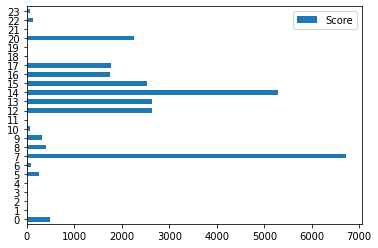

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 67.5412230680637
Test Prediction  67.47533146744571


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  71.61469121869688


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  72.08022414729679


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  77.21591744529547


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  72.90669446311256


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  75.29039070749735


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  69.63488718075874


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  30.033681816193518


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
6,vc,6.716203
5,vnet,4.043850
15,packet_count_index,3.991086
23,vnet_vc_cc_index,2.188909
8,hop_count,1.961935
11,enqueue_time,0.884402
21,cache_coherence_vnet_index,0.693272
1,inport,0.259639
4,flit_type,0.232516
3,flit_id,0.162453


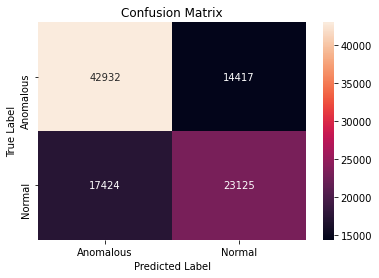

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73     57349
           1       0.62      0.57      0.59     40549

    accuracy                           0.67     97898
   macro avg       0.66      0.66      0.66     97898
weighted avg       0.67      0.67      0.67     97898



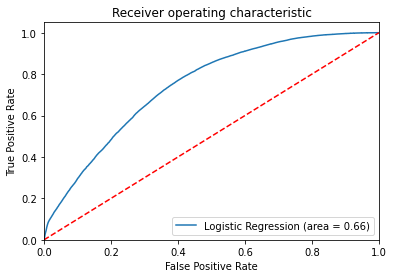

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

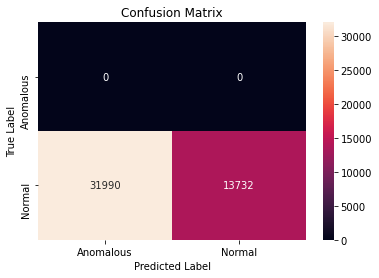

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.30      0.46     45722

    accuracy                           0.30     45722
   macro avg       0.50      0.15      0.23     45722
weighted avg       1.00      0.30      0.46     45722



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 87.23508576594338
Test Prediction  80.72892193916117


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  75.43463664804788


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  73.91571604197044


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  87.09681731296199


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  74.5401928378434


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  75.36581686528888


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  52.54669807422101


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  22.116267879795284


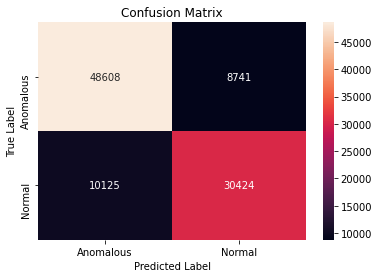

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     57349
           1       0.78      0.75      0.76     40549

    accuracy                           0.81     97898
   macro avg       0.80      0.80      0.80     97898
weighted avg       0.81      0.81      0.81     97898



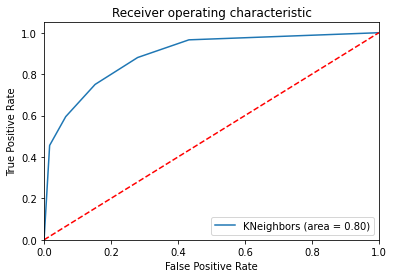

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

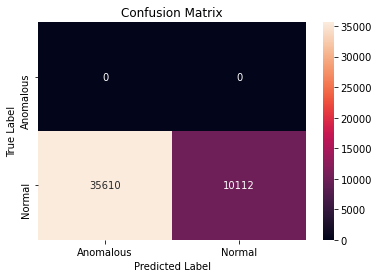

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.22      0.36     45722

    accuracy                           0.22     45722
   macro avg       0.50      0.11      0.18     45722
weighted avg       1.00      0.22      0.36     45722



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 63.8266141285889
Test Prediction Score 63.77658379129297


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 48.66359052013542


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  49.22949366726706


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  55.52525698092526


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  50.573987464168646


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  51.63674762407603


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  51.667493181254656


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  60.06517650146538


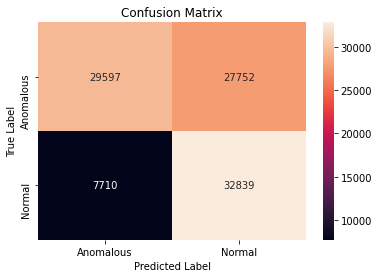

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.79      0.52      0.63     57349
           1       0.54      0.81      0.65     40549

    accuracy                           0.64     97898
   macro avg       0.67      0.66      0.64     97898
weighted avg       0.69      0.64      0.64     97898



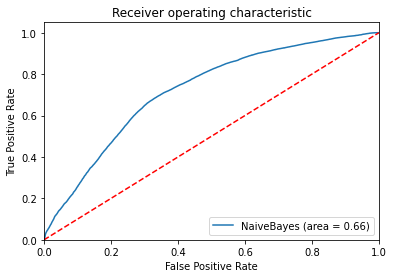

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 313271 samples, validate on 78318 samples
Epoch 1/10
313271/313271 [==============================] - 11s 35us/step - loss: 0.2023 - accuracy: 0.6683 - val_loss: 0.1897 - val_accuracy: 0.6938
Epoch 2/10
313271/313271 [==============================] - 11s 35us/step - loss: 0.1861 - accuracy: 0.6992 - val_loss: 0.1849 - val_accuracy: 0.7040
Epoch 3/10
313271/313271 [==============================] - 11s 35us/step - loss: 0.1837 - accuracy: 0.7065 - val_loss: 0.1835 - val_accuracy: 0.7083
Epoch 4/10
313271/313271 [==============================] - 11s 35us/step - loss: 0.1829 - accuracy: 0.7098 - val_loss: 0.1831 - val_accuracy: 0.7088
Epoch 5/10
313271/313271 [==============================] - 11s 34us/step - loss: 0.1825 - accuracy: 0.7105 - val_loss: 0.1827 - val_accuracy: 0.7094
Epoch 6/10
313271/313271 [==============================] - 11s 35us/step - loss: 0.1823 - accuracy: 0.7108 - val_loss: 0.1822 - val_accuracy: 0.7092
Epoch 7/10
313271/313271 [=======================

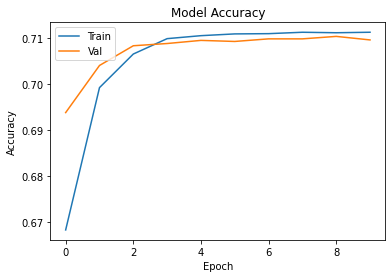

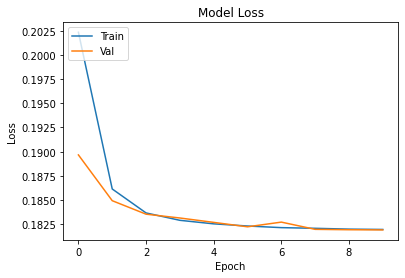

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.09%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.69%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.08%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.91%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.39%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.36%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.09%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 33.87%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 313271 samples, validate on 78318 samples
Epoch 1/30
313271/313271 [==============================] - 11s 35us/step - loss: 0.2216 - accuracy: 0.6277 - val_loss: 0.1998 - val_accuracy: 0.6730
Epoch 2/30
313271/313271 [==============================] - 11s 35us/step - loss: 0.1955 - accuracy: 0.6850 - val_loss: 0.1922 - val_accuracy: 0.6901
Epoch 3/30
313271/313271 [==============================] - 11s 35us/step - loss: 0.1904 - accuracy: 0.6917 - val_loss: 0.1890 - val_accuracy: 0.6916
Epoch 4/30
313271/313271 [==============================] - 11s 35us/step - loss: 0.1880 - accuracy: 0.6928 - val_loss: 0.1870 - val_accuracy: 0.6956
Epoch 5/30
313271/313271 [==============================] - 11s 34us/step - loss: 0.1857 - accuracy: 0.6958 - val_loss: 0.1854 - val_accuracy: 0.7013
Epoch 6/30
313271/313271 [==============================] - 11s 36us/step - loss: 0.1829 - accuracy: 0.6991 - val_loss: 0.1817 - val_accuracy: 0.6961
Epoch 7/30
313271/313271 [=======================

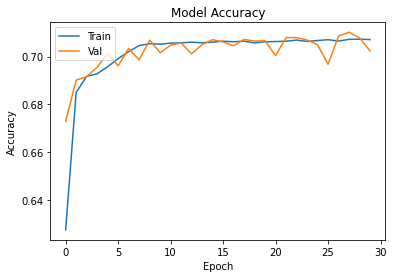

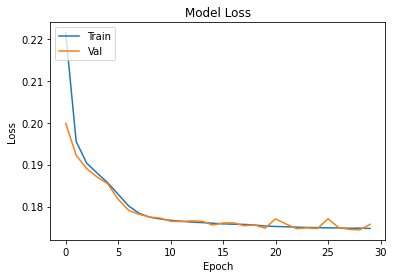

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.32%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.76%
accuracy: 74.10%
accuracy: 78.25%
accuracy: 69.19%
accuracy: 72.81%
accuracy: 55.30%
accuracy: 27.64%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 313271 samples, validate on 78318 samples
Epoch 1/30
313271/313271 [==============================] - 11s 37us/step - loss: 0.2365 - accuracy: 0.5914 - val_loss: 0.2161 - val_accuracy: 0.6295
Epoch 2/30
313271/313271 [==============================] - 11s 35us/step - loss: 0.2011 - accuracy: 0.6633 - val_loss: 0.1946 - val_accuracy: 0.6884
Epoch 3/30
313271/313271 [==============================] - 12s 37us/step - loss: 0.1884 - accuracy: 0.6977 - val_loss: 0.1829 - val_accuracy: 0.7112
Epoch 4/30
313271/313271 [==============================] - 12s 39us/step - loss: 0.1801 - accuracy: 0.7134 - val_loss: 0.1775 - val_accuracy: 0.7118
Epoch 5/30
313271/313271 [==============================] - 12s 37us/step - loss: 0.1755 - accuracy: 0.7173 - val_loss: 0.1733 - val_accuracy: 0.7195
Epoch 6/30
313271/313271 [==============================] - 11s 35us/step - loss: 0.1717 - accuracy: 0.7218 - val_loss: 0.1698 - val_accuracy: 0.7211
Epoch 7/30
313271/313271 [=======================

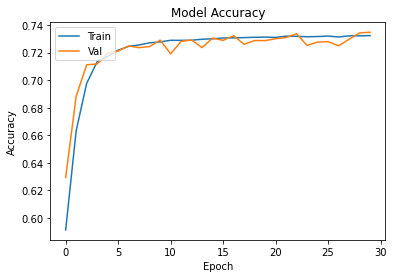

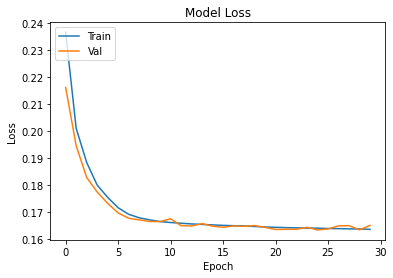

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.49%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 68.88%
accuracy: 69.15%
accuracy: 74.75%
accuracy: 63.96%
accuracy: 67.16%
accuracy: 54.78%
accuracy: 33.24%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 313271 samples, validate on 78318 samples
Epoch 1/100
313271/313271 [==============================] - 23s 74us/step - loss: 0.1708 - accuracy: 0.7222 - val_loss: 0.1573 - val_accuracy: 0.7487
Epoch 2/100
313271/313271 [==============================] - 22s 70us/step - loss: 0.1601 - accuracy: 0.7419 - val_loss: 0.1546 - val_accuracy: 0.7450
Epoch 3/100
313271/313271 [==============================] - 22s 69us/step - loss: 0.1561 - accuracy: 0.7476 - val_loss: 0.1510 - val_accuracy: 0.7558
Epoch 4/100
313271/313271 [==============================] - 21s 67us/step - loss: 0.1537 - accuracy: 0.7525 - val_loss: 0.1485 - val_accuracy: 0.7635
Epoch 5/100
313271/313271 [==============================] - 22s 69us/step - loss: 0.1518 - accuracy: 0.7562 - val_loss: 0.1484 - val_accuracy: 0.7651
Epoch 6/100
313271/313271 [==============================] - 21s 67us/step - loss: 0.1502 - accuracy: 0.7588 - val_loss: 0.1438 - val_accuracy: 0.7671
Epoch 7/100
313271/313271 [================

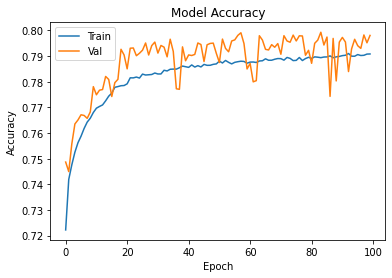

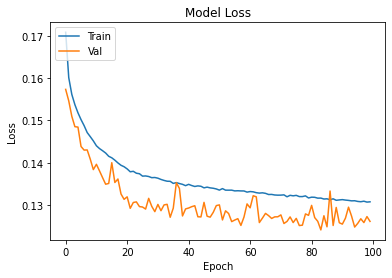

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.02%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.97%
accuracy: 65.91%
accuracy: 79.23%
accuracy: 67.54%
accuracy: 66.35%
accuracy: 48.75%
accuracy: 29.87%


In [270]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 313271 samples, validate on 78318 samples
Epoch 1/50
313271/313271 [==============================] - 22s 69us/step - loss: 0.1705 - accuracy: 0.7200 - val_loss: 0.1553 - val_accuracy: 0.7468
Epoch 2/50
313271/313271 [==============================] - 21s 67us/step - loss: 0.1600 - accuracy: 0.7412 - val_loss: 0.1501 - val_accuracy: 0.7532
Epoch 3/50
313271/313271 [==============================] - 21s 68us/step - loss: 0.1561 - accuracy: 0.7485 - val_loss: 0.1501 - val_accuracy: 0.7562
Epoch 4/50
313271/313271 [==============================] - 22s 70us/step - loss: 0.1533 - accuracy: 0.7517 - val_loss: 0.1456 - val_accuracy: 0.7606
Epoch 5/50
313271/313271 [==============================] - 22s 69us/step - loss: 0.1522 - accuracy: 0.7549 - val_loss: 0.1447 - val_accuracy: 0.7669
Epoch 6/50
313271/313271 [==============================] - 22s 69us/step - loss: 0.1514 - accuracy: 0.7560 - val_loss: 0.1442 - val_accuracy: 0.7678
Epoch 7/50
313271/313271 [=======================

In [271]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.49%


In [272]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 68.71%
accuracy: 69.03%
accuracy: 83.10%
accuracy: 71.44%
accuracy: 72.08%
accuracy: 49.89%
accuracy: 26.95%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [274]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [276]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 93.72658578254241
Test Prediction Score 90.54321845185805


In [277]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 79.66314766931902
Test Prediction Score 75.65971924407468
Test Prediction Score 79.68079560492441
Test Prediction Score 79.49280629808945
Test Prediction Score 79.1384961395521
Test Prediction Score 66.12116703859823
Test Prediction Score 33.80866978697345


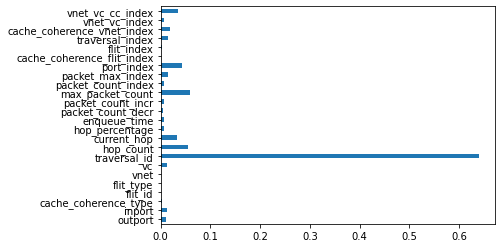

In [278]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

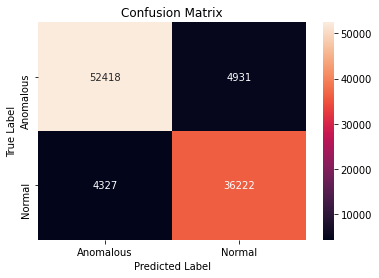

In [279]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [280]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     57349
           1       0.88      0.89      0.89     40549

    accuracy                           0.91     97898
   macro avg       0.90      0.90      0.90     97898
weighted avg       0.91      0.91      0.91     97898



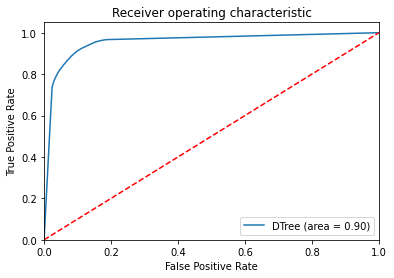

In [281]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [283]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [285]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 96.60664625410827
Test Prediction Score 92.02435187644284


In [286]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 80.63599091441552
Test Prediction Score 76.04282814420905
Test Prediction Score 80.32909598855782
Test Prediction Score 79.98930202575742
Test Prediction Score 80.95969500404559
Test Prediction Score 66.4765683114307
Test Prediction Score 33.80210839420848


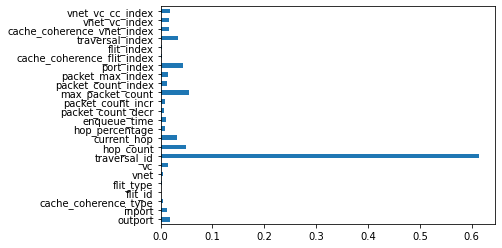

In [287]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

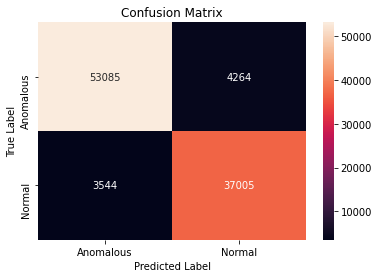

In [288]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [289]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     57349
           1       0.90      0.91      0.90     40549

    accuracy                           0.92     97898
   macro avg       0.92      0.92      0.92     97898
weighted avg       0.92      0.92      0.92     97898



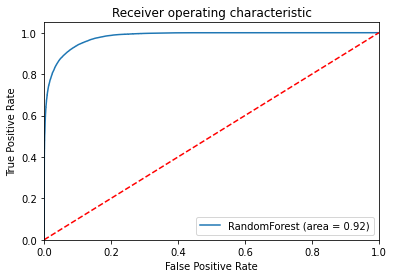

In [290]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [292]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [294]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.39119842487915
Test Prediction Score 95.404400498478


In [295]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 81.34026656762046
Test Prediction Score 76.25725476741859
Test Prediction Score 85.45668417746053
Test Prediction Score 80.45836705023933
Test Prediction Score 79.70350663064497
Test Prediction Score 65.24816100504174
Test Prediction Score 25.687852674861116


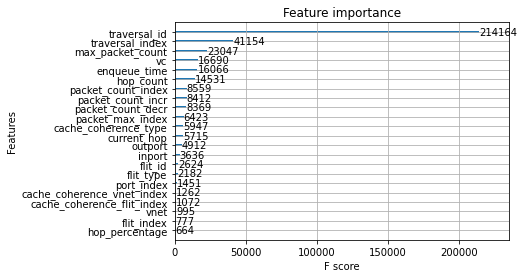

In [296]:
plot_importance(xgbc)
plt.show()

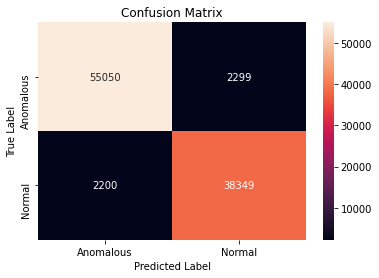

In [297]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [298]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     57349
           1       0.94      0.95      0.94     40549

    accuracy                           0.95     97898
   macro avg       0.95      0.95      0.95     97898
weighted avg       0.95      0.95      0.95     97898



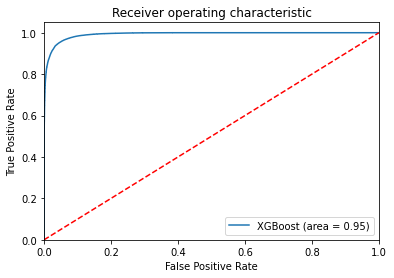

In [299]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [301]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [303]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 85.83233951924085
Test Prediction Score 85.0599603669125


In [304]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 77.50174997500035
Test Prediction Score 76.34016639505961
Test Prediction Score 85.03294969991045
Test Prediction Score 78.20904938898109
Test Prediction Score 76.9607372564078
Test Prediction Score 63.76663360608315
Test Prediction Score 28.959800533659948


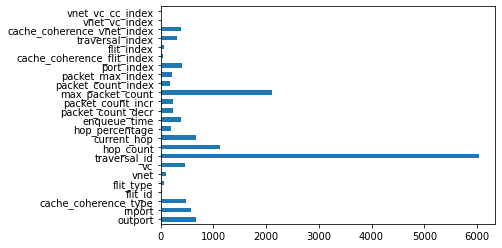

In [305]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

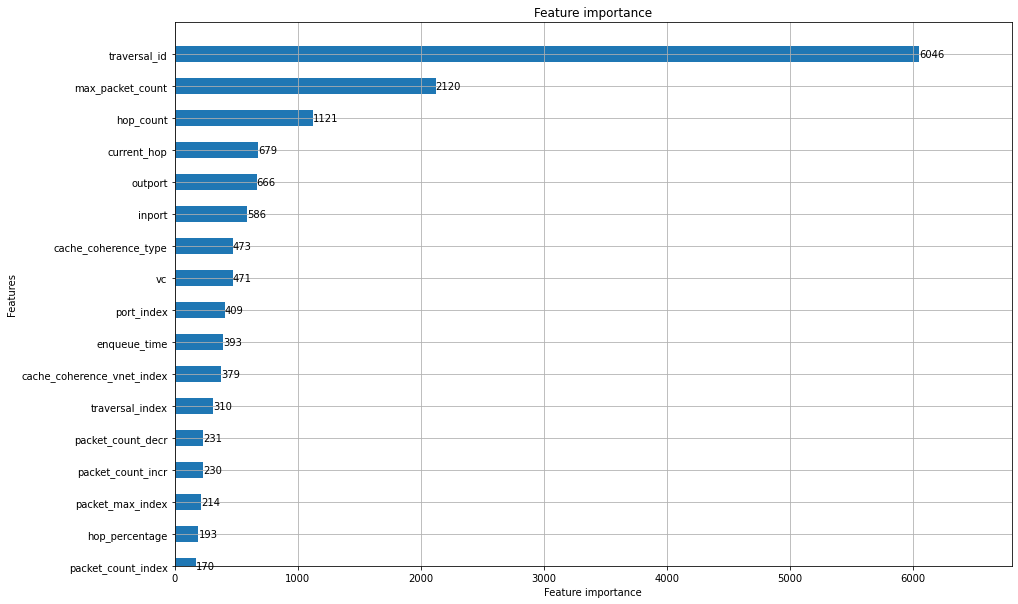

In [306]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [307]:
sorted(gbm.feature_importances_,reverse=True)

[6046,
 2120,
 1121,
 679,
 666,
 586,
 473,
 471,
 409,
 393,
 379,
 310,
 231,
 230,
 214,
 193,
 170,
 105,
 71,
 56,
 53,
 24,
 0,
 0]

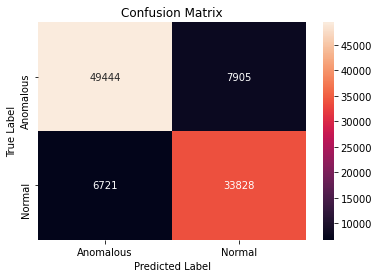

In [308]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [309]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     57349
           1       0.81      0.83      0.82     40549

    accuracy                           0.85     97898
   macro avg       0.85      0.85      0.85     97898
weighted avg       0.85      0.85      0.85     97898



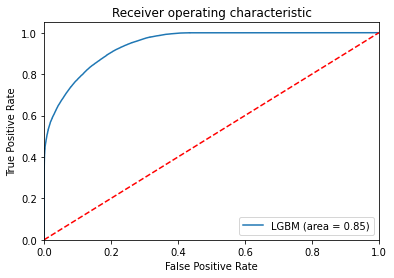

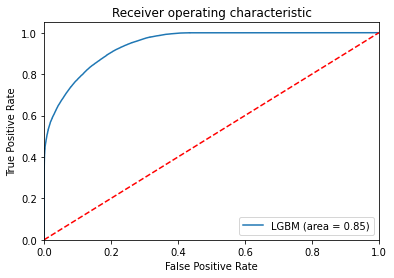

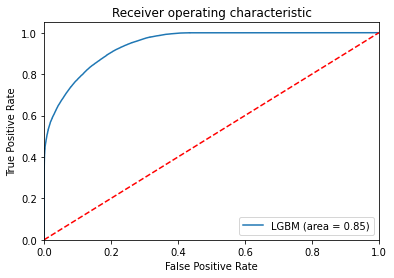

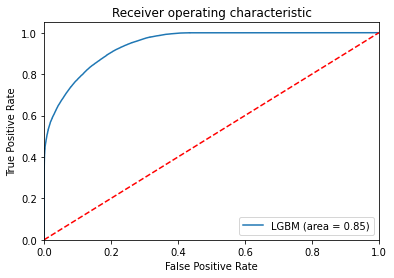

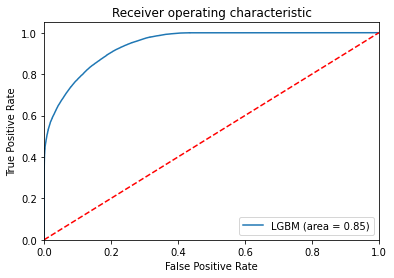

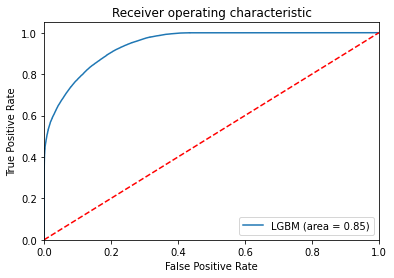

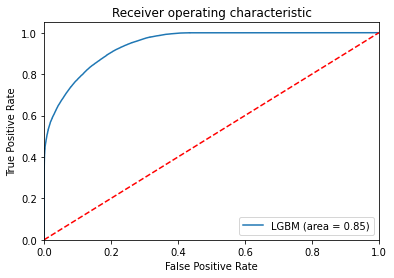

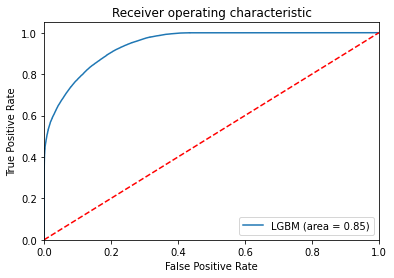

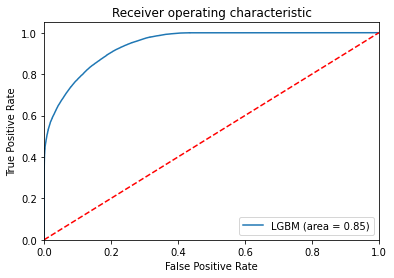

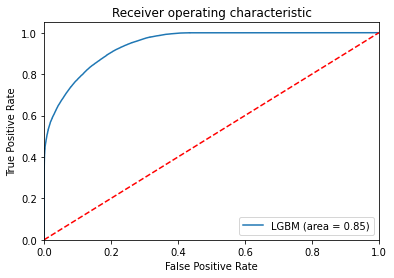

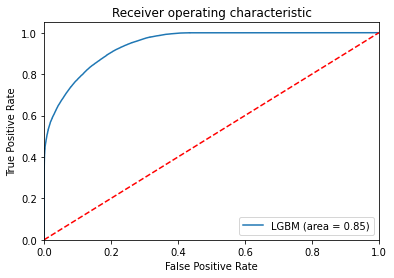

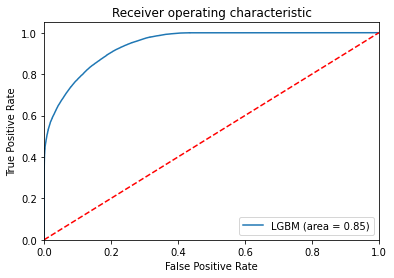

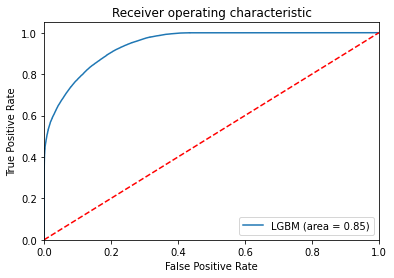

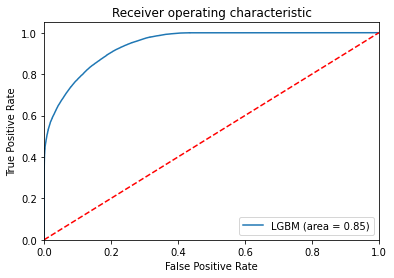

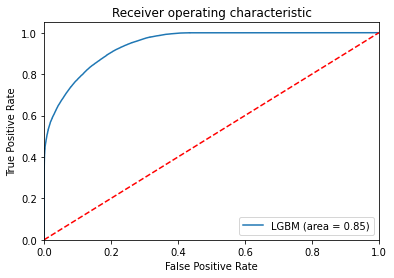

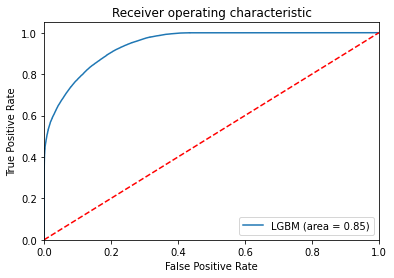

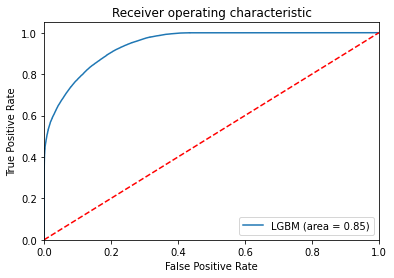

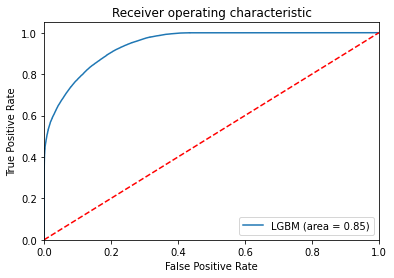

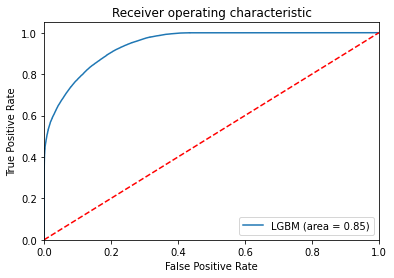

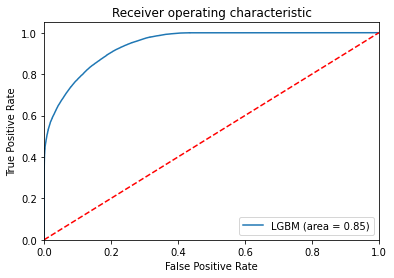

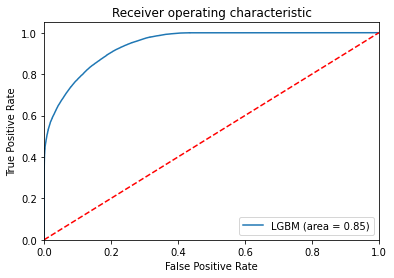

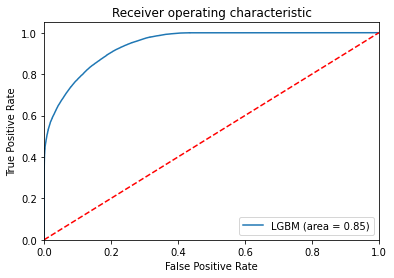

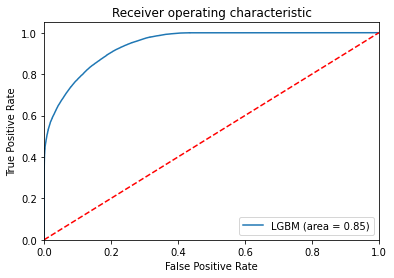

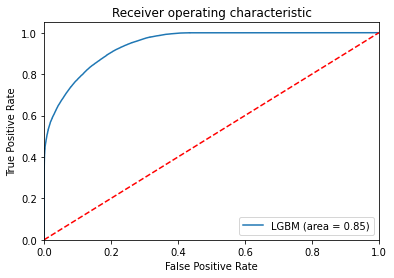

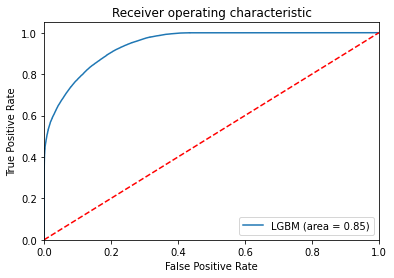

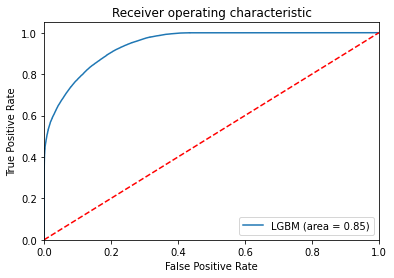

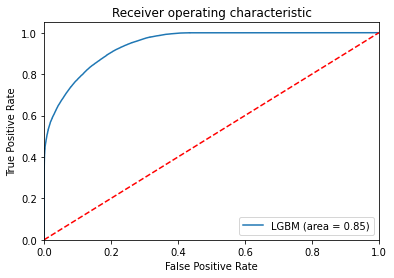

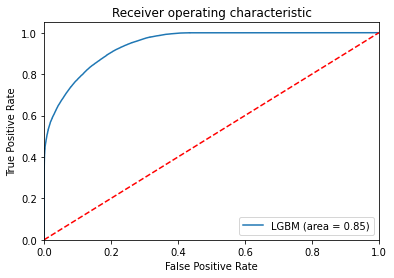

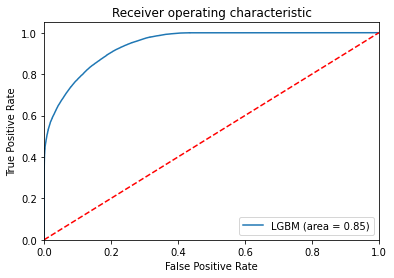

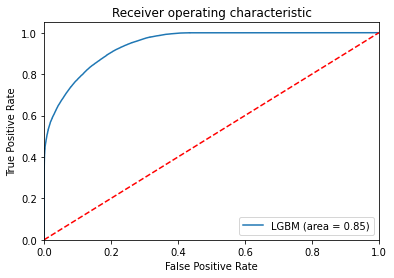

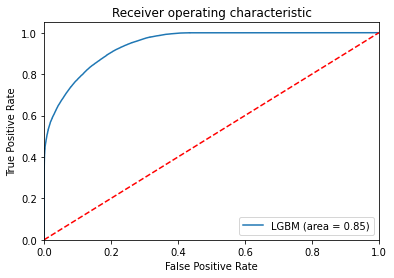

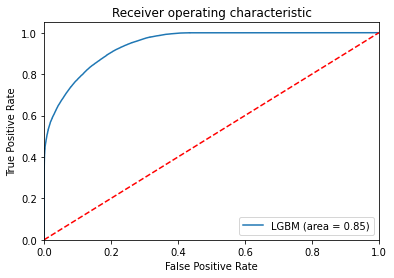

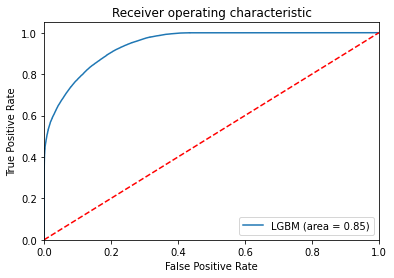

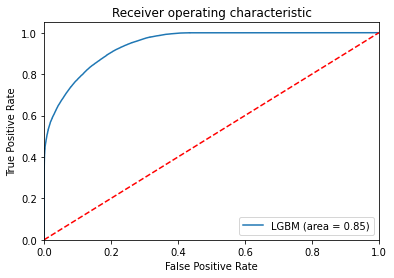

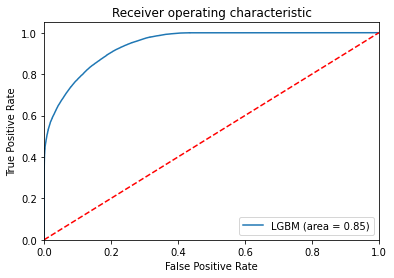

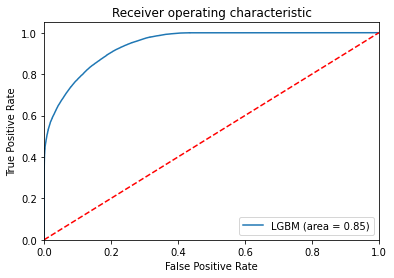

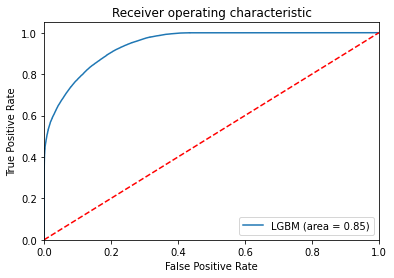

In [310]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()